# Credit Card Fraud Detection Model 
## By
# Ezulu Priscilla Chinwendu

### CREDIT CARD FRAUD PREDICTION USING LOGISTICS REGRESSION MODEL
Digital payments are evolving, but so are cyber criminalities. According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistics that shows fraud is still very common both for card-present and card-not present type of payments despite available methods of fraud prevention. In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging and hence, the need for adoption of machine learning approach. In this work, I will build a mchine learning (logistic regression) model to predict fraudulent transaction by combining various characteristics of transactions.

### Dataset
The dataset used in this project was downloaded from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud.
 - Feature Explanation:
   - distancefromhome - the distance from account owner's home to where the transaction happened.
   - distancefromlast_transaction - the distance from last transaction happened.
   - ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.
   - repeat_retailer - Is the transaction happened from same retailer.
   - used_chip - Is the transaction through chip (credit card).
   - usedpinnumber - DId the transaction happened by using PIN number.
   - online_order - Was the transaction for an online order.
   - fraud - Is the transaction fraudulent.
     
### Model Development
One significant challenge in building a fraud detection model is the imbalance in the fraud dataset. Fraud-free transactions are naturally much more prevalent than fraudulent ones, resulting in inherently unbalanced datasets. In this case, only 8.74% of the transactions are fraudulent. Machine learning models generally struggle with unbalanced data, often leading to poor performance. This approach involves fitting a logistic regression model to the dataset, evaluating its performance, and then applying techniques to address the rare class problem to determine if model performance can be improved.

### Library and Data Importation

In [86]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [87]:
# Loading the dataset
df = pd.read_csv('credit_card_transaction_data.csv')

### Exploratory Data Analysis

In [88]:
# To view first 5 rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [89]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [90]:
# Counts occurrences of each unique value in the 'fraud' column
df[['fraud']].value_counts()

fraud
0.0      912597
1.0       87403
Name: count, dtype: int64

Observe below that out of 1 million transactions in the datasate, only 87,403 (8.74%) transactions are fraudulent

In [91]:
# Generates summary statistics for numeric columns and transposes the result
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [92]:
# Filters rows where 'fraud' is 1 and assigns them to df_fraud
df_fraud = df.loc[df['fraud'] == 1]

# Displays the filtered DataFrame
df_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [93]:
# Calculates the mean value of each feature, grouped by 'fraud' (fraudulent and non-fraudulent transactions)
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


<Axes: xlabel='fraud', ylabel='count'>

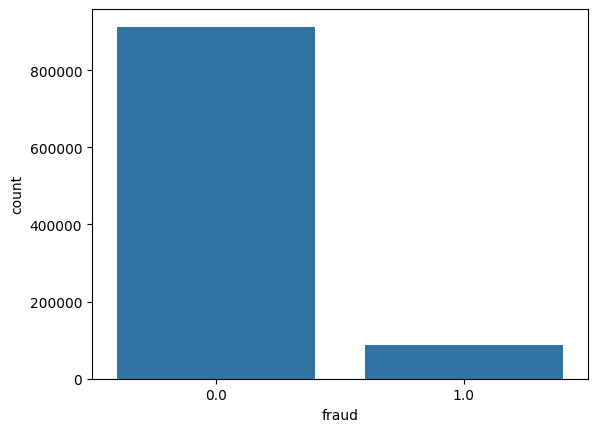

In [94]:
# Visualizing the count plot and the unbalanced nature of the dataset
sns.countplot(x = 'fraud', data = df)

In [95]:
# Correlation of each of the variables with fraud
df.corr()['fraud'].sort_values()

used_pin_number                  -0.100293
used_chip                        -0.060975
repeat_retailer                  -0.001357
distance_from_last_transaction    0.091917
distance_from_home                0.187571
online_order                      0.191973
ratio_to_median_purchase_price    0.462305
fraud                             1.000000
Name: fraud, dtype: float64

<Axes: >

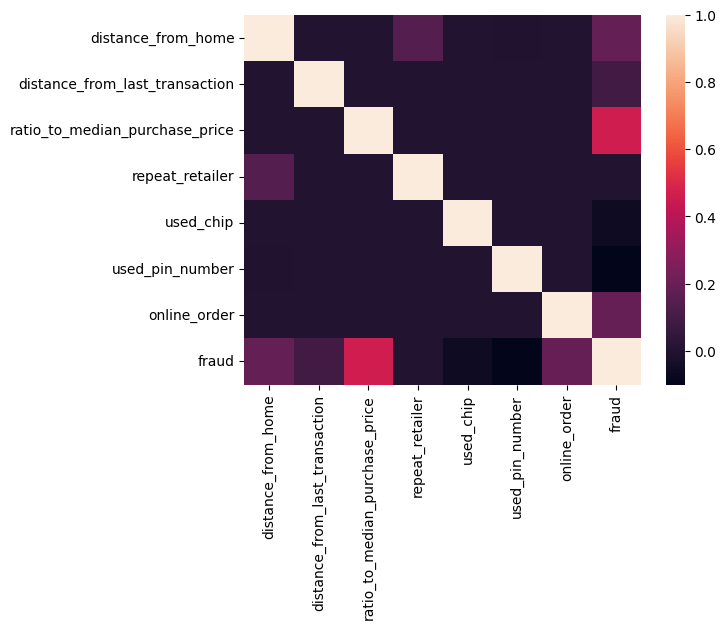

In [96]:
# Visualizes the correlation matrix of features using a heatmap
sns.heatmap(df.corr())

<Axes: >

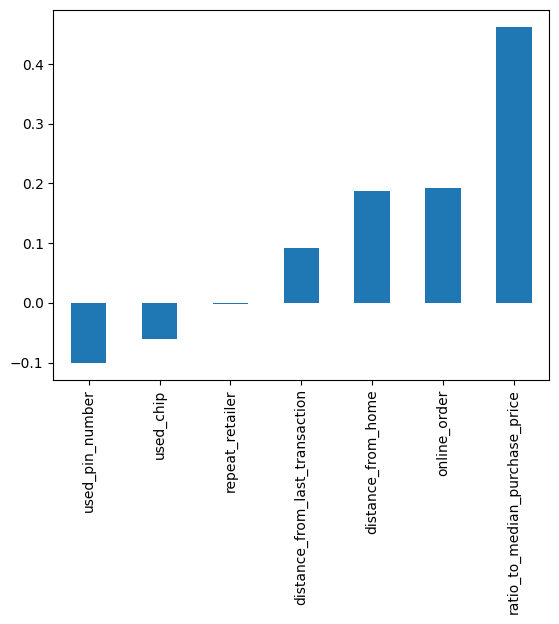

In [97]:
# visualizing the correlation
df.corr()['fraud'][:-1].sort_values().plot(kind='bar')

To further explore the variables with significant correlations with fraud

<Axes: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

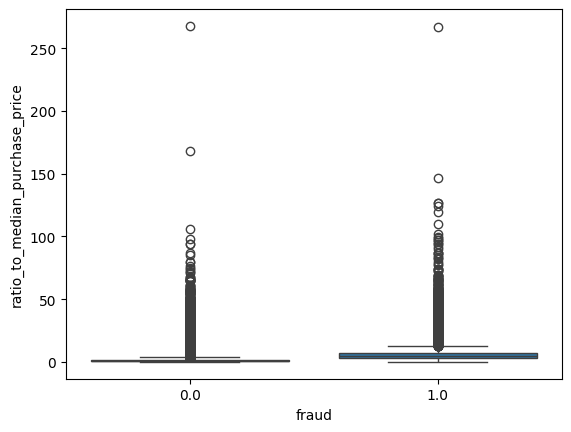

In [98]:
# Creates a boxplot to compare the distribution of 'ratio_to_median_purchase_price'
# between fraudulent (fraud=1) and non-fraudulent (fraud=0) transactions
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df)


<Axes: xlabel='fraud', ylabel='count'>

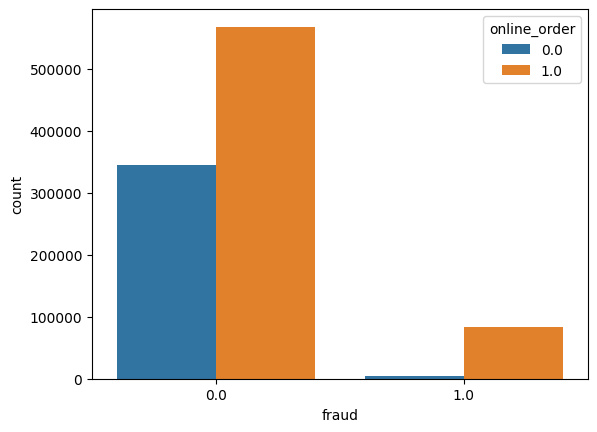

In [99]:
# Displays the count of fraudulent vs. non-fraudulent transactions, 
# categorized by whether the order is online or not
sns.countplot(x='fraud', hue='online_order', data=df)


Online orders are more likely to be fraudulent

<Axes: xlabel='fraud', ylabel='count'>

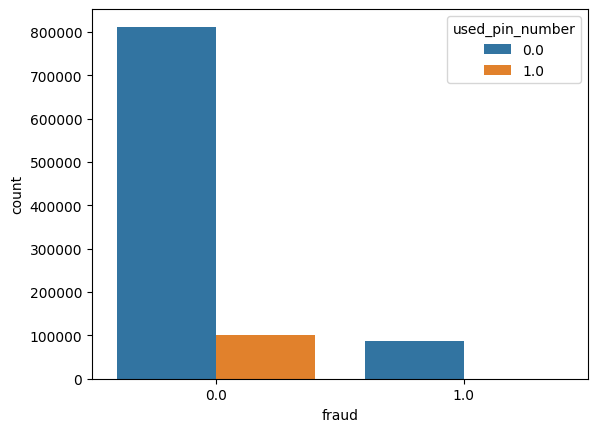

In [100]:
## Displays the count of fraudulent vs. non-fraudulent transactions, 
# categorized by whether the used pin number or not
sns.countplot(x='fraud',hue='used_pin_number',data=df)

Transactions are less likely to be fraudulent when pin numbers are used

<Axes: xlabel='fraud', ylabel='distance_from_home'>

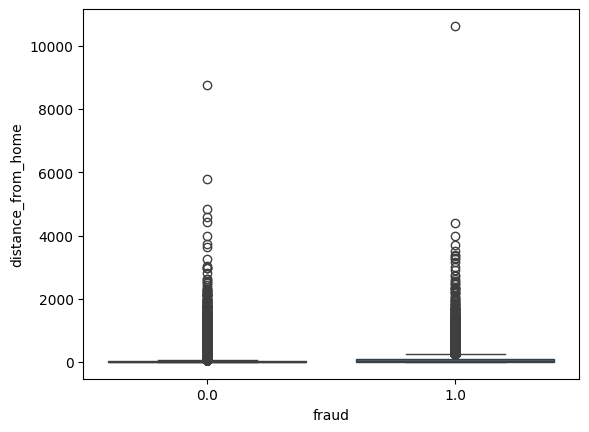

In [101]:
# Creating a boxplot to comparefraudulent vs. non-fraudulent transactions by distance from home
sns.boxplot(x='fraud',y='distance_from_home',data=df)

## Data Preparation and Model Training

In [102]:
# Imports the train_test_split function to split data into training and test sets
from sklearn.model_selection import train_test_split

In [103]:
# Separating features (X) from the target variable (y) by dropping the 'fraud' column
X = df.drop('fraud', axis=1)
y = df['fraud']

In [104]:
# Splits the data into training and test sets with 30% of the data used for testing
# Ensures reproducibility with a fixed random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [105]:
# Imports StandardScaler to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Creates an instance of StandardScaler
scaler = StandardScaler()

# Fits the scaler on the training data and transforms it
X_trained_transformed = scaler.fit_transform(X_train)

# Converts the transformed data back to a DataFrame with the original column names
columns = X.columns
X_trained_transformed = pd.DataFrame(X_trained_transformed, columns=columns)

# Displays the first few rows of the standardized training data
X_trained_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.211056,-0.094865,1.992367,0.366168,-0.735005,-0.334095,0.732968
1,-0.381153,0.930823,1.836468,0.366168,1.360535,-0.334095,0.732968
2,-0.262578,-0.205536,-0.545305,0.366168,-0.735005,-0.334095,0.732968
3,-0.204920,-0.151519,0.142076,0.366168,-0.735005,-0.334095,-1.364316
4,-0.234033,-0.227503,-0.546827,0.366168,-0.735005,-0.334095,0.732968


In [106]:
# Imports the LogisticRegression class for performing logistic regression
from sklearn.linear_model import LogisticRegression

In [107]:
# Creates an instance of the LogisticRegression model with a maximum of 200 iterations for convergence
logmodel = LogisticRegression(max_iter=200)

In [108]:
# Trains the logistic regression model using the standardized training data and target variable
logmodel.fit(X_trained_transformed, y_train)

LogisticRegression(max_iter=200)

## Prediction and Model Assessment

In [109]:
# Transforms the test data using the same scaler fitted on the training data
X_test_transformed = scaler.transform(X_test)

# Converts the transformed test data back to a DataFrame with the original column names
columns = X.columns
X_test_transformed = pd.DataFrame(X_test_transformed, columns=columns)

# Displays the first few rows of the standardized test data
X_test_transformed.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.559393,-0.222628,1.788491,0.366168,1.360535,-0.334095,0.732968
1,-0.322869,-0.216238,0.103321,0.366168,-0.735005,-0.334095,0.732968
2,-0.341000,-0.223533,0.309806,0.366168,1.360535,-0.334095,0.732968
3,-0.347664,-0.118146,0.771869,0.366168,-0.735005,-0.334095,0.732968
4,-0.388108,0.205750,-0.130159,-2.730988,1.360535,-0.334095,0.732968


In [110]:
# Uses the trained logistic regression model to make predictions on the standardized test data
predictions = logmodel.predict(X_test_transformed)

In [111]:
# Imports functions to evaluate the performance of the classification model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
# To view the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273810
         1.0       0.89      0.61      0.72     26190

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



Note: Precision measure accuracy of positive prediction while recall measure the completeness of positive prediction. Recall equals true positive over True Positive plus False negative while 

In [113]:
# Viewing the confusion metrics
confusion_matrix(y_test, predictions)

array([[271789,   2021],
       [ 10233,  15957]], dtype=int64)

In [114]:
#To view accuracy score only
accuracy_score(y_test, predictions)

0.9591533333333333

In [115]:
To plot the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

SyntaxError: invalid syntax (902860141.py, line 1)

##### As shown above, while the overall accuracy of 0.95915 may seem high, it is not an appropriate metric for evaluating this model due to the unbalanced nature of the dataset. A more accurate assessment comes from considering precision and recall alongside accuracy. 
##### However, with a precision of 0.61 and a recall of 0.72, the model struggles to correctly classify the rare class compared to the other class. Therefore, I will apply oversampling techniques to improve the model’s performance.

In [ ]:
# Reimporting the raw dataset
df = pd.read_csv('credit_card_transaction_data.csv')

In [ ]:
df.head()

## Oversampling

In [ ]:
# Defining the dependent and independent variables
X = df.drop(['fraud'],axis = 1)
y = df['fraud']

In [ ]:
# Oversampling using the imbalanced-learn python library
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# Re-merging for EDA
df_over = pd.concat([X_over,y_over],axis=1)

In [ ]:
df_over.head()

## Exploratory Data Analysis

In [ ]:
# Displaying the new count of fraud category
sns.countplot(x='fraud',data=df_over)

Classes are now balanced

In [ ]:
# A quick look at mean value of the features for fraudulent and non-fraudulent transactions
df_over.groupby('fraud').mean()

In [ ]:
# Generates summary statistics for numeric columns in df_over and transposes the result for easier viewing
df_over.describe().transpose()

In [ ]:
# Correlation of each of the variables with fraud
df_over.corr()['fraud'].sort_values()

In [ ]:
# Plotting the heat map of the correlation
sns.heatmap(df_over.corr())

In [ ]:
# Ploting the correlation in a bar chart
df_over.corr()['fraud'][:-1].sort_values().plot(kind='bar')

#### To further explore the variables with significant correlations with fraud

In [ ]:
# ration to median purchase price higher for fraudulent transactions
sns.boxplot(x='fraud',y='ratio_to_median_purchase_price',data=df_over)

In [ ]:
# Plotting fraud against online order
sns.countplot(x='fraud',hue='online_order',data=df_over)

Online orders are more likely to be fraudulent

In [ ]:
# Plotting fraud against use of pin number
sns.countplot(x='fraud',hue='used_pin_number',data=df_over)

Transactions are less likely to be fraudulent when pin numbers are used

In [ ]:
# Plotting a boxplot of fraud against distancefrom home
sns.boxplot(x='fraud',y='distance_from_home',data=df_over)

## Data Preparation, Model Training and Assessment

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Splits the oversampled data into training and test sets with 30% of the data used for testing
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state = 43)

In [ ]:
#Transforming the independent variable to make it appropriate to be passed into logistic regression model
from sklearn.preprocessing import StandardScaler
columns = X_over.columns
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns = columns)
X_train_transformed.head()

In [ ]:
#Importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Creates an instance of the LogisticRegression model with a maximum of 200 iterations for convergence
logmodel = LogisticRegression(max_iter=200)

In [ ]:
# Trains the logistic regression model using the oversampled training data and target variable
logmodel.fit(X_train_transformed, y_train)

In [ ]:
# Transforms the test data using the same scaler fitted on the training data
X_test_transformed = scaler.transform(X_test)

# Converts the transformed test data back to a DataFrame with the original column names
X_test_transformed = pd.DataFrame(X_test_transformed, columns=columns)

# Displays the first few rows of the standardized test data
X_test_transformed.head()


In [ ]:
# Uses the trained logistic regression model to make predictions on the standardized test data
predictions = logmodel.predict(X_test_transformed)

In [ ]:
# Importing model evaluation functions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# View the classification report
print(classification_report(y_test, predictions))

In [ ]:
# Viewing the confusion matrix
confusion_matrix(y_test, predictions)

In [ ]:
# Viewing the accuracy score
accuracy_score(y_test, predictions)

In [ ]:
# Ploting the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test_transformed))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_transformed)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Predicting a Single Class

In [ ]:
#predict a fraudulent transaction
df_1fraud=df[df['fraud']==1].head(1)
df_1fraud=df_1fraud.drop('fraud',axis=1)
df_1fraud

In [ ]:
# Transforms the df_1fraud data using the same scaler fitted on the training data
df_1fraud = scaler.transform(df_1fraud)

In [ ]:
# Viewing df_1fraud
df_1fraud

In [ ]:
# Coverting to a DataFrame
df_1fraud = pd.DataFrame(df_1fraud, columns = columns)

In [ ]:
# Correctly predicted as fraudulent
logmodel.predict(df_1fraud)

##### As shown above, the precision and recall have improved significantly from 0.61 and 0.72 to 0.95 and 0.94, respectively. 
##### Although the overall accuracy has slightly decreased from 0.95917 to 0.941, this model performs much better on the unbalanced dataset. Therefore, it has been chosen for credit card fraud prevention.

## Saving the Final Model and Scalar 

In [ ]:
# importing job lib to save the model
import joblib
joblib.dump(logmodel, 'credit_card_fraud_prediction.sav')

#save the scaler for transforming new records
joblib.dump(scaler,'credit_card_fraud_prediction_scaler.pkl')

## Code for Deployment

In [ ]:
# Loads the trained logistic regression model and scaler from saved files
model = joblib.load('credit_card_fraud_prediction.sav')
scaler = joblib.load('credit_card_fraud_prediction_scaler.pkl')

In [ ]:
# Defines a function to preprocess a sample JSON, transform it using the scaler, and return the model's prediction as 'fraudulent' or 'not fraudulent'
def return_prediction(model,scaler,sample_json):
    
    ft_a = sample_json['distance_from_home']
    ft_b = sample_json['distance_from_last_transaction']
    ft_c = sample_json['ratio_to_median_purchase_price']
    ft_d = sample_json['repeat_retailer']
    ft_e = sample_json['used_chip']
    ft_f = sample_json['used_pin_number']
    ft_g = sample_json['online_order']
    
    columns = ['distance_from_home',
                'distance_from_last_transaction',
                'ratio_to_median_purchase_price',
                'repeat_retailer',
                'used_chip',
                'used_pin_number',
                'online_order']
    
    transaction = [[ft_a,ft_b,ft_c,ft_d,ft_e,ft_f,ft_g]]
    
    transaction = pd.DataFrame(transaction, columns = columns)
    
    transaction = scaler.transform(transaction)
    
    transaction = pd.DataFrame(transaction, columns = columns)
    
    classes = np.array(['not fraudulent', 'fraudulent'])
    
    class_ind = model.predict(transaction)

    class_ind = class_ind[0]
    
    return classes[int(class_ind)]   

## Predicting Fraudulent and Non Fraudulent Classes Using the Function 

In [ ]:
# Retrieving the last row of fraudulent transactions from the DataFrame
df_fraud2 = df[df['fraud'] == 1].tail(1)

# Displays the selected row
df_fraud2


In [ ]:
transaction_example = {'distance_from_home':15.724799,
                        'distance_from_last_transaction':1.875906,
                        'ratio_to_median_purchase_price':11.009366,
                        'repeat_retailer':1.0,
                        'used_chip':1.0,
                        'used_pin_number':0.0,
                        'online_order':1.0
                       }

In [ ]:
# Returning the prediction
return_prediction(model,scaler,transaction_example)

The transaction is correctly predicted as fraudulent

In [ ]:
# Selecting non fraudulent transaction
df_not_fraud = df.head(1)
df_not_fraud

In [ ]:
# Predicting a non fraudulent transaction
df.head(1)

In [ ]:
transaction_example2 = {'distance_from_home':57.877857,
                        'distance_from_last_transaction':0.31114,
                        'ratio_to_median_purchase_price':1.94594,
                        'repeat_retailer':1.0,
                        'used_chip':1.0,
                        'used_pin_number':0.0,
                        'online_order':0.0
                       }

In [ ]:
# Returning the prediction
return_prediction(model,scaler,transaction_example2)

The transaction was correctly predicted